In [676]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn import metrics

Clustering with Original Dataset (using K-Means algorithm)


In [677]:
Original_dataFrame = pd.read_csv('data.csv')

Here i displayed the distrubition of data

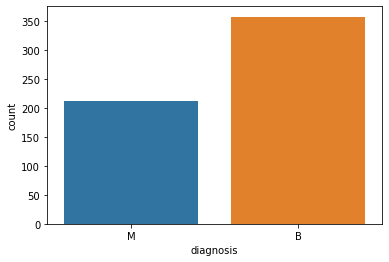

In [678]:
sns.countplot(Original_dataFrame['diagnosis'],label = "count")                     


 I changed the diagnosis values '0' for 'B'  and 1 for 'M'

In [679]:

Original_dataFrame.diagnosis =Original_dataFrame.diagnosis.replace({'B' : 0,'M':1}) 
 

I removed the 'ID' column because it has no meaning for clustering the data


In [680]:

Original_dataFrame.drop(['id'],1,inplace = True) 

At the end of the file there was a unnamed columnt which has Nan values. I dropped entire column


In [681]:
Original_dataFrame=Original_dataFrame.dropna(axis=1)        

Now, Im checking whether is there any 'na' values or not

In [682]:
Original_dataFrame[Original_dataFrame.isna().any(1)]          

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Since there is no 'na values' ,I don't have to delete anything for this reason

Now ,I stored the diagnosis values into variable x_OD

In [683]:
x_OD=Original_dataFrame['diagnosis']                            



After storing the values I dropped the 'dianosis' column

In [684]:
Original_dataFrame.drop(columns =['diagnosis'],inplace = True)   


Below ,we can see the correlation of the features

In [685]:
Original_dataFrame.corr() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Given code below is a visualized version of correlation.
In this part of code I displayed the correlation heatmap

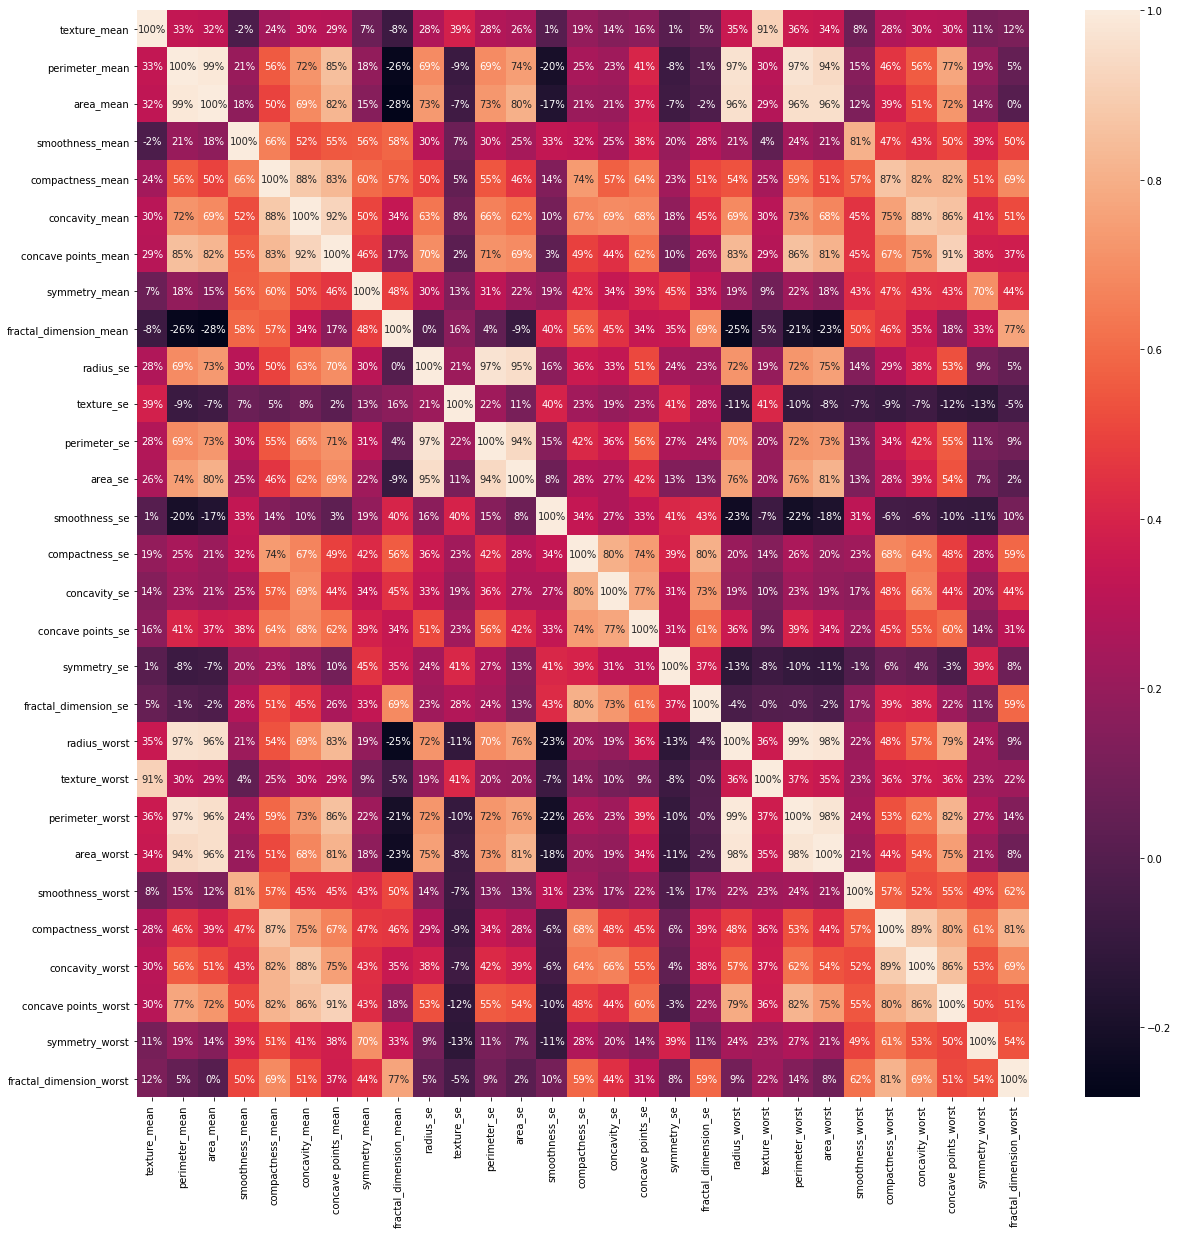

In [686]:
plt.figure(figsize=(20,20))
sns.heatmap(Original_dataFrame.iloc[:,1:].corr(),annot=True,fmt ='.0%') 

According to Correlation heatmap, Im going to try to delete columns that correlated with each other with values> 95
Which are 'radius_worst','perimeter_worst','area_mean', 'perimeter_se', 'area_se'

In [687]:
Original_dataFrame.drop(columns =['radius_worst','perimeter_worst','area_mean', 'perimeter_se', 'area_se'],inplace=True)

In [688]:
Original_dataFrame

,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.05963,0.009208,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Now I finished the Data preparation

From now on I am going to use K-means cluster with original Data

In [689]:
kmeans_OD = KMeans(n_clusters=2)     


I set the cluster size to 2

In [690]:
OD_predicted = kmeans_OD.fit_predict(Original_dataFrame) #Fitting the original dataframe


OD_predicted is the cluster values for each record

In [691]:
OD_predicted                                            

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

Now in order to visualize the clusters I am going to use Principal Component Analysis (PCA).

In [692]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Original_dataFrame)


In [693]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
 
principalDf['cluster'] =OD_predicted


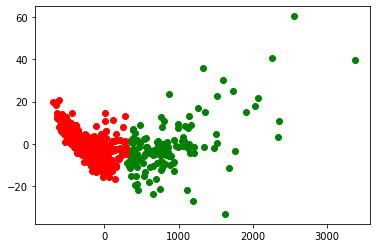

In [694]:
df1= principalDf[principalDf.cluster == 0]
df2= principalDf[principalDf.cluster == 1]

plt.scatter(df1['principal component 1'],df1['principal component 2'],color ='green')
plt.scatter(df2['principal component 1'],df2['principal component 2'],color ='red')



Below I will use scatter plots to show the relation between features and clusters/

--First Relation between "radius_mean" and  "texture_mean"

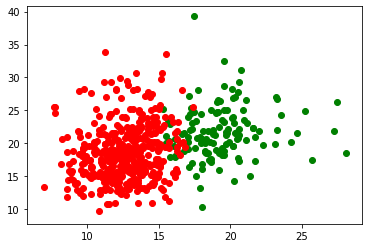

In [695]:
xx= Original_dataFrame[OD_predicted == 0]
yy= Original_dataFrame[OD_predicted == 1]
plt.scatter(xx["radius_mean"],xx["texture_mean"],color ='green')
plt.scatter(yy['radius_mean'],yy['texture_mean'],color ='red')


--Then , relation between "compactness_mean" and  "concave points_mean"

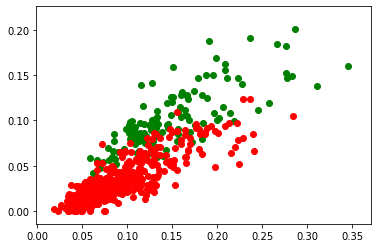

In [696]:
xx= Original_dataFrame[OD_predicted == 0]
yy= Original_dataFrame[OD_predicted == 1]
plt.scatter(xx["compactness_mean"],xx["concave points_mean"],color ='green')
plt.scatter(yy['compactness_mean'],yy['concave points_mean'],color ='red')


--Finally , relation between "compactness_mean" and  "symmetry_mean"

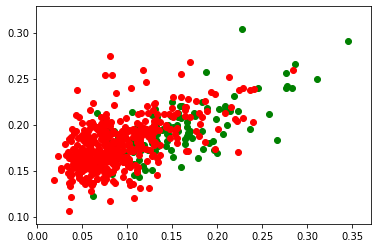

In [697]:
xx= Original_dataFrame[OD_predicted == 0]
yy= Original_dataFrame[OD_predicted == 1] 
plt.scatter(xx["compactness_mean"],xx["symmetry_mean"],color ='green')
plt.scatter(yy['compactness_mean'],yy['symmetry_mean'],color ='red')


Here I Calculated the adjusted_rand_score for clustering with original_dataframe

In [698]:
metrics.adjusted_rand_score(x_OD, OD_predicted)


0.49142453622455523

-----I have completed the Clustering for Original Data-----

##############################################################################################################################

Clustering Normalized Dataset (using K-Means algorithm)
 


Here , I started to read the data for normalizing part of the task

In [699]:
Normalized_Data = pd.read_csv('data.csv')  


I changed the diagnosis values '0' for 'B' and 1 for 'M'


In [700]:
Normalized_Data.diagnosis =Normalized_Data.diagnosis.replace({'B' : 0,'M':1})       

I removed the 'ID' column because it has no meaning for clustering the data

In [701]:
Normalized_Data.drop(['id'],1,inplace = True)   


I stored the diagnosis values into variable x_OD before removing the column


In [702]:
x=Normalized_Data['diagnosis']               

After storing the values I dropped the 'dianosis' column

In [703]:
Normalized_Data.drop(['diagnosis'],1,inplace = True) 
 

At the end of the file there was a unnamed columnt which has Nan values. I dropped entire column

In [704]:
Normalized_Data=Normalized_Data.dropna(axis=1)   

Now I am going to do Scaling on the data .Created MinMaxScaler object for scaling the original data

In [705]:
scaler = MinMaxScaler()                         
Normalized_Data[:] = scaler.fit_transform(Normalized_Data[:]) 

Creating Kmeans object

In [706]:
kmeans_ND = KMeans(n_clusters=2)                   


Now Im going to delete the one of the column that highly correlated with each other 

In [707]:
Normalized_Data.corr()  

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [708]:
Normalized_Data.drop(columns =['radius_worst','perimeter_worst','area_mean', 'perimeter_se', 'area_se'],inplace=True)


I deleted the columns that I mentioned

Now our Data is ready for clustering

In [709]:
ND_predicted = kmeans_ND.fit_predict(Normalized_Data) # Fitting the Normalized data


In [710]:
ND_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

Now in order to visualize the clusters I am going to use Principal Component Analysis (PCA).

In [711]:
pca = PCA(n_components=2)
principalComponents_ND = pca.fit_transform(Normalized_Data)
principalDataframe= pd.DataFrame(data = principalComponents_ND
             , columns = ['principal component 1', 'principal component 2'])
principalDataframe['clusterResult'] =ND_predicted




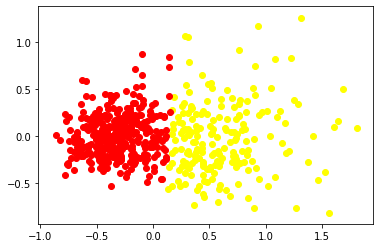

In [712]:
df_11= principalDataframe[principalDataframe.clusterResult == 0]
df_21= principalDataframe[principalDataframe.clusterResult == 1]

plt.scatter(df_11['principal component 1'],df_11['principal component 2'],color ='yellow')
plt.scatter(df_21['principal component 1'],df_21['principal component 2'],color ='red')


Below I calculated the adjusted_rand_score for normalized data. As we see from the results by normalizing the data we get higher  adjusted_rand_score.

In [713]:
metrics.adjusted_rand_score(x_OD, ND_predicted)


0.6594271719206948

 Normalization is a technique often applied as part of data preparation for machine learning. 
 The goal of normalization is to change the values of numeric columns in the
 dataset to a common scale, without distorting differences in the ranges of values
 It is required only when features have different ranges.As we see from the plots ; by normalizing the data we get more clear cluster from the given dataset

#                         ###              This was all the things about clustering           ###

Now Im going to start Classification part

In [714]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [715]:
Original_df = pd.read_csv('data.csv')
 

I changed the diagnosis values '0' for 'B' and 1 for 'M' like I did for clustering
 

In [716]:
Original_df.diagnosis =Original_df.diagnosis.replace({'B' : 0,'M':1})


I removed the 'ID' column because it has no meaning for classification

In [717]:
Original_df.drop(['id'],1,inplace = True) 


I stored the diagnosis values into variable diagnosis

In [718]:
diagnosis_OD=Original_df['diagnosis']                             


After storing the values I dropped the 'dianosis' column

In [719]:
Original_df.drop(columns =['diagnosis'],inplace = True)   


At the end of the file there was a unnamed columnt which has Nan values. I dropped entire column

In [720]:
Original_df=Original_df.dropna(axis=1)  


Now, Im checking whether is there any 'na' values or not

In [721]:
Original_df[Original_df.isna().any(1)]          

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


We can see the correlation of the features again

In [722]:
Original_df.corr() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


According to Correlation , Im going to try to delete columns that correlated with each other with values> 95
Which are 'radius_worst','perimeter_worst','area_mean', 'perimeter_se', 'area_se'

In [723]:
Original_df.drop(columns =['radius_worst','perimeter_worst','area_mean', 'perimeter_se', 'area_se'],inplace=True)

I split the data into train and test with the test_size = 0.2

In [724]:
OD_train , OD_test, diagnosis_train_OD, diagnosis_test_OD =train_test_split(Original_df,diagnosis_OD,test_size=0.20,random_state=1)

I selected the SVM for classification

In [725]:
model = SVC()            

In [726]:
model.fit(OD_train,diagnosis_train_OD)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Classification accuracy for Original data:

In [727]:
model.score(OD_test,diagnosis_test_OD)

0.9035087719298246

In [728]:
y_pred =model.predict(OD_test)

Confusion_matrix for original Data:

In [729]:
 confusion_matrix(diagnosis_test_OD, y_pred, labels=[0,  1])
 

array([[72,  0],
       [11, 31]], dtype=int64)

Classification_report for original data:

In [730]:
print(classification_report(diagnosis_test_OD,y_pred,target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        72
           1       1.00      0.74      0.85        42

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



                        ---Now Im going to do classification by normalizing the data---

In [731]:
Normalized_df = pd.read_csv('data.csv')


I changed the diagnosis values '0' for 'B' and 1 for 'M'

In [732]:
Normalized_df.diagnosis =Normalized_df.diagnosis.replace({'B' : 0,'M':1}) 
 


I removed the 'ID' column because it has no meaning for clustering the data

In [733]:
Normalized_df.drop(['id'],1,inplace = True) 


I stored the diagnosis values into variable diagnosis

In [734]:
diagnosis=Normalized_df['diagnosis']                          

After storing the values I dropped the 'dianosis' column

In [735]:
Normalized_df.drop(columns =['diagnosis'],inplace = True)    


At the end of the file there was a unnamed columnt which has Nan values. I dropped entire column

In [736]:
Normalized_df=Normalized_df.dropna(axis=1)          

In [737]:
Normalized_df.drop(columns =['radius_worst','perimeter_worst','area_mean', 'perimeter_se', 'area_se'],inplace=True)

According to Correlation , Im  deleted columns that correlated with each other with values> 95 again

Now, Im checking whether is there any 'na' values or not

In [738]:
Normalized_df[Normalized_df.isna().any(1)]          

,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Created MinMaxScaler object for scaling the original data

Now I have normalized the data using MinMaxScaler

In [739]:
scaler2 = MinMaxScaler()                         
Normalized_df[:] = scaler2.fit_transform(Normalized_df[:]) 


Below I will use scatter plots to show the relation between features and classes/

--First Relation between "radius_mean" and  "texture_mean"

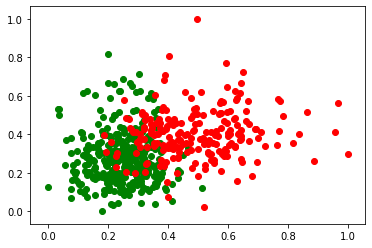

In [740]:
Class0= Normalized_df[diagnosis == 0]
Class1= Normalized_df[diagnosis == 1]
plt.scatter(Class0["radius_mean"],Class0["texture_mean"],color ='green')
plt.scatter(Class1['radius_mean'],Class1['texture_mean'],color ='red')


--Then, Relation between "compactness_mean" and  "concave points_mean"

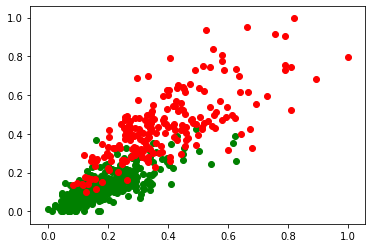

In [741]:
Class0= Normalized_df[diagnosis == 0]
Class1= Normalized_df[diagnosis == 1]
plt.scatter(Class0["compactness_mean"],Class0["concave points_mean"],color ='green')
plt.scatter(Class1['compactness_mean'],Class1['concave points_mean'],color ='red')


Finally, Relation between "compactness_mean" and "symmetry_mean"

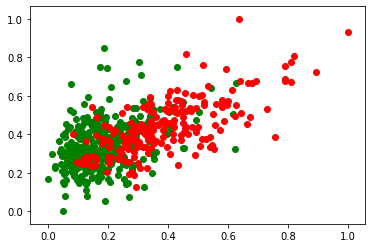

In [742]:
Class0= Normalized_df[diagnosis == 0]
Class1= Normalized_df[diagnosis == 1] 
plt.scatter(Class0["compactness_mean"],Class0["symmetry_mean"],color ='green')
plt.scatter(Class1['compactness_mean'],Class1['symmetry_mean'],color ='red')


I split the data into train and test with the test_size = 0.20 same as I did for classification for original data

In [743]:
ND_train , ND_test, diagnosis_train, diagnosis_test =train_test_split(Normalized_df,diagnosis,test_size=0.20,random_state=1) 

In [744]:
model.fit(ND_train,diagnosis_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Classification accuracy for Normalized Data:

In [745]:
model.score(ND_test,diagnosis_test)

0.9736842105263158

In [746]:
y_pred_ND =model.predict(ND_test)
 

Confusion_matrix for the Normalized Data

In [747]:
confusion_matrix(diagnosis_test, y_pred_ND, labels=[0,  1])

array([[72,  0],
       [ 3, 39]], dtype=int64)

Classification_report for Normalized Data:

In [496]:
print(classification_report(diagnosis_test,y_pred_ND,target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



AS WE SEE FROM THE RESULTS ACCURACY IN NORMALIZED DATA IS HIGHER THAN ORIGINAL DATA